# E-commerce Sales Analysis

### Objective: 

To comprehensively analyze sales data from an e-commerce platform and derive actionable insights.

## **Contents:**

1. Import libraries and dataset
2. About the dataset
3. Descriptive Statistics
4. Preprocessing date column
5. Revenue analysis
    - Total revenue generated
    - Month Wise Revenue analysis
    - Week Wise Revenue analysis - April month
    - Week Wise Revenue analysis - May month
    - Week Wise Revenue analysis - June month
    - Day wise revenue analysis
6. Product/Category analysis
   - Top 10 Products by Revenue generation
   - Most costly Order
   - Most costly Category/product
   - Max, Min, Average Order value
7. Geographical analysis
   - Popular categories by state
   - Popular categories by city
   - Top ship cities by revenue
   - Top ship states by revenue
8. Promotion analysis
   - Average order value vs Average order value with promotion
   - City with the most promotion-ids usage
   - Top 10 cities with promotion-ids usage
   - Categories ordered with promotion-ids
9. Cancellation analysis
   - Categories vs Cancellations
   - City vs Cancellations
   - Month vs Cancellations
10. Summary 
11. Conclusion

# Import libraries and dataset

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset

df = pd.read_csv("Amazon_Sale_Report.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

## About the dataset


| Attribute          | Description                                             |
|--------------------|---------------------------------------------------------|
| Order ID           | Unique identifier for each order                         |
| Date               | Date of the order                                       |
| Status             | Current status of the order (e.g., Shipped, Cancelled, Delivered to Buyer, etc.) |
| Fulfilment         | Who fulfilled the order (e.g., Amazon, Merchant)        |
| Sales Channel      | Channel through which the order was made (e.g., Amazon.in) |
| ship-service-level | Shipping service level (e.g., Standard, Expedited)       |
| Style              | Style of the product                                    |
| SKU                | Stock Keeping Unit, unique identifier for each product   |
| Category           | Category of the product                                 |
| Quantity           | Quantity of products ordered                            |
| Currency           | Currency in which the transaction was made              |
| Amount             | Amount of the transaction                                |
| ship-city          | City where the product was shipped                      |
| ship-state         | State where the product was shipped                     |
| ship-postal-code   | Postal code where the product was shipped                |
| ship-country       | Country where the product was shipped                    |
| Promotion IDs      | Promotion IDs if any                                    |
| B2B                | A boolean indicating whether the order is Business-to-Business (B2B) |
| fulfilled-by       | Who fulfilled the shipping (e.g., Easy Ship)             |

Source: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data?resource=download

## Descriptive Statistics

In [5]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,128975,120378,171-5057375-2831560,12
Date,128975,91,05-03-2022,2085
Status,128975,13,Shipped,77804
Fulfilment,128975,2,Amazon,89698
Sales Channel,128975,2,Amazon.in,128851
ship-service-level,128975,2,Expedited,88615
Style,128975,1377,JNE3797,4224
SKU,128975,7195,JNE3797-KR-L,773
Category,128975,9,Set,50284
Size,128975,11,M,22711


In [6]:
# descriptive statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


## Preprocessing date column

In [8]:
# preprocessing date column for further analysis

# converting data type
df['Date'] = pd.to_datetime(df['Date'])
# Now, the 'Date' column will be of datetime data type
#exploring date column
df['Date'].describe()

count                  128975
unique                     91
top       2022-05-03 00:00:00
freq                     2085
first     2022-03-31 00:00:00
last      2022-06-29 00:00:00
Name: Date, dtype: object

In [10]:
from datetime import datetime

# Define the first and last dates as strings
first_date_str = '2022-03-31 00:00:00'
last_date_str = '2022-06-29 00:00:00'

# Convert the date strings to datetime objects
first_date = datetime.strptime(first_date_str, '%Y-%m-%d %H:%M:%S')
last_date = datetime.strptime(last_date_str, '%Y-%m-%d %H:%M:%S')

# Calculate the difference in days and add 1 to include both first and last days
time_difference = last_date - first_date
days_difference = time_difference.days + 1

print("Number of days including both the first and last days:", days_difference)


Number of days including both the first and last days: 91


# Revenue analysis

To understand revenue generated, we will analyse Amount attribute. 
- Total revenue generated
- Revenue generated by month

In [5]:
# descriptive statistics of amount column
df['Amount'].describe()

count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

### <span style='color:Blue'> *Observatios:* </span>

1. **Average Amount**: The average transaction amount is approximately 648.56, indicating the typical or mean value of transactions in dataset.

2. **Minimum Amount**: The minimum transaction amount is 0.0, These represent cases of canceled transactions.

3. **Maximum Amount**: The maximum transaction amount is 5,584.0, indicating that some transactions involve a relatively high monetary value.

4. **Amount Distribution**: The dataset provides a distribution of transaction amounts, with a wide range of values. The 25th percentile (Q1) is 449.0, the median (Q2 or 50th percentile) is 605.0, and the 75th percentile (Q3) is 788.0. These quartiles help understand the spread of transaction amounts.

5. **Variability**: The standard deviation (std) of approximately 281.21 indicates that there is some variability in transaction amounts. Some transactions are significantly higher or lower than the mean.


- Many transactions have amounts that fall within the 25th to 75th percentile range (449.0 to 788.0), indicating typical transaction values.
- The top three transaction amounts are 399.0, 771.0, and 735.0, which are the most common transaction values in the dataset.


## Total revenue generated

In [7]:
total_revenue = df['Amount'].sum()
print("Total Revenue Generated: ₹{:.2f}".format(total_revenue))

Total Revenue Generated: ₹78592678.30


### <span style='color:Blue'> *Observatios:* </span>
Total revenue generated from 2022-03-31 to  2022-06-29 (91 dyas) is **Seven Crore Eighty Five Lakh Ninety Two Thousand Six Hundred Seventy Eight rupees.**

## Month Wise Revenue analysis

In [15]:
# Filter data for each month and calculate the sum of 'Amount'
fourth_month_amount = df[(df['Date'].dt.month == 4)]['Amount'].sum()
fifth_month_amount = df[(df['Date'].dt.month == 5)]['Amount'].sum()
sixth_month_amount = df[(df['Date'].dt.month == 6)]['Amount'].sum()

print("Amount generated in 4th month:", fourth_month_amount)
print("Amount generated in 5th month:", fifth_month_amount)
print("Amount generated in 6th month:", sixth_month_amount)


# Calculate the total amount for all three months
total_amount_all_months = df[(df['Date'].dt.month >= 4) & (df['Date'].dt.month <= 6)]['Amount'].sum()

# Calculate the percentages
percentage_fourth_month = round((fourth_month_amount / total_amount_all_months) * 100, 2)
percentage_fifth_month = round((fifth_month_amount / total_amount_all_months) * 100, 2)
percentage_sixth_month = round((sixth_month_amount / total_amount_all_months) * 100,2)
print('-'*70)
print("Percentage of amount generated in 4th month:", percentage_fourth_month, "%")
print("Percentage of amount generated in 5th month:", percentage_fifth_month, "%")
print("Percentage of amount generated in 6th month:", percentage_sixth_month, "%")


Amount generated in 4th month: 28838708.32
Amount generated in 5th month: 26226476.75
Amount generated in 6th month: 23425809.38
----------------------------------------------------------------------
Percentage of amount generated in 4th month: 36.74 %
Percentage of amount generated in 5th month: 33.41 %
Percentage of amount generated in 6th month: 29.85 %


### <span style='color:Blue'> *Observatios:* </span>

Amount generated in the 4th month is **Two Crore Eighty Eight Lakh Thirty Eight Thousand Seven Hundred Eight rupees.**

Amount generated in the 5th month is **Two Crore Sixty Two Lakh Twenty Six Thousand Four Hundred Seventy Six rupees**

Amount generated in the 6th month is **Two Crore Thirty Four Lakh Twenty Five Thousand Eight Hundred Nine rupees**

There is a decrease in revenue generation from month to month.

# Week Wise Revenue analysis - April month

In [26]:
# Filter data for the 4th month (April)
april_data = df[df['Date'].dt.month == 4]

# Group data by week and calculate the sum of 'Amount'
weekly_amounts_april = april_data.groupby(df['Date'].dt.week)['Amount'].sum()

# Get the start and end dates for each week
week_start_date = april_data.groupby(df['Date'].dt.week)['Date'].min()
week_end_date = april_data.groupby(df['Date'].dt.week)['Date'].max()

# Calculate the number of days in each week
no_of_days_in_week = (week_end_date - week_start_date).dt.days + 1

# Create a DataFrame with the calculated values
result_df = pd.DataFrame({
    'Week': weekly_amounts_april.index,
    'week_start_date': week_start_date,
    'week_end_date': week_end_date,
    'no_of_days_in_week': no_of_days_in_week,
    'Amount': weekly_amounts_april.values
})

# Print the result
result_df

,Week,week_start_date,week_end_date,no_of_days_in_week,Amount
Date,,,,,
13,13,2022-04-01,2022-04-03,3,2790343.51
14,14,2022-04-04,2022-04-10,7,6695415.95
15,15,2022-04-11,2022-04-17,7,6902700.42
16,16,2022-04-18,2022-04-24,7,7063406.00
17,17,2022-04-25,2022-04-30,6,5386842.44


# Week Wise Revenue analysis - May month

In [27]:
# Filter data for the 5th month (May)
may_data = df[df['Date'].dt.month == 5]

# Group data by week and calculate the sum of 'Amount'
weekly_amounts_may = may_data.groupby(df['Date'].dt.week)['Amount'].sum()

# Get the start and end dates for each week
week_start_date = may_data.groupby(df['Date'].dt.week)['Date'].min()
week_end_date = may_data.groupby(df['Date'].dt.week)['Date'].max()

# Calculate the number of days in each week
no_of_days_in_week = (week_end_date - week_start_date).dt.days + 1

# Create a DataFrame with the calculated values
result_df = pd.DataFrame({
    'Week': weekly_amounts_may.index,
    'week_start_date': week_start_date,
    'week_end_date': week_end_date,
    'no_of_days_in_week': no_of_days_in_week,
    'Amount': weekly_amounts_may.values
})

# Print the result
result_df

,Week,week_start_date,week_end_date,no_of_days_in_week,Amount
Date,,,,,
17,17,2022-05-01,2022-05-01,1,1079957.52
18,18,2022-05-02,2022-05-08,7,7190464.94
19,19,2022-05-09,2022-05-15,7,5367831.55
20,20,2022-05-16,2022-05-22,7,5283885.33
21,21,2022-05-23,2022-05-29,7,5583804.55
22,22,2022-05-30,2022-05-31,2,1720532.86


# Week Wise Revenue analysis - June month

In [29]:
# Filter data for the 6th month (june)
june_data = df[df['Date'].dt.month == 6]

# Group data by week and calculate the sum of 'Amount'
weekly_amounts_june = june_data.groupby(df['Date'].dt.week)['Amount'].sum()

# Get the start and end dates for each week
week_start_date = june_data.groupby(df['Date'].dt.week)['Date'].min()
week_end_date = june_data.groupby(df['Date'].dt.week)['Date'].max()

# Calculate the number of days in each week
no_of_days_in_week = (week_end_date - week_start_date).dt.days + 1

# Create a DataFrame with the calculated values
result_df = pd.DataFrame({
    'Week': weekly_amounts_june.index,
    'week_start_date': week_start_date,
    'week_end_date': week_end_date,
    'no_of_days_in_week': no_of_days_in_week,
    'Amount': weekly_amounts_june.values
})

# Print the result
result_df

,Week,week_start_date,week_end_date,no_of_days_in_week,Amount
Date,,,,,
22,22,2022-06-01,2022-06-05,5,4451862.35
23,23,2022-06-06,2022-06-12,7,6463328.67
24,24,2022-06-13,2022-06-19,7,5559803.37
25,25,2022-06-20,2022-06-26,7,5053074.03
26,26,2022-06-27,2022-06-29,3,1897740.96


## Week wise revenue analysis

In [30]:

# Convert 'Date' column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Group data by year, month, and week and calculate the sum of 'Amount'
weekly_amounts = df.groupby([df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.week])['Amount'].sum()

# Reset the index with drop=True to remove the existing 'Date' column from the index
weekly_amounts = weekly_amounts.reset_index(drop=True)

# Rename columns for clarity
weekly_amounts.columns = ['Year', 'Month', 'Week', 'Amount']

# Print the result
print(weekly_amounts)


0      101683.85
1     2790343.51
2     6695415.95
3     6902700.42
4     7063406.00
5     5386842.44
6     1079957.52
7     7190464.94
8     5367831.55
9     5283885.33
10    5583804.55
11    1720532.86
12    4451862.35
13    6463328.67
14    5559803.37
15    5053074.03
16    1897740.96
Name: Amount, dtype: float64


### <span style='color:Blue'> *Observatios:* </span>

**For April:**
- Sales started on the first day of April (Week 13) and gradually increased over the first two weeks.
- The highest sales week in April was Week 14, with ₹6,695,415.95 in sales.
- Sales slightly decreased in the following weeks, with Week 17 having the lowest sales among the weeks.

**For May:**
- May started with a single-day week (Week 17) but had significant sales.
- Week 18 saw a substantial increase in sales, with ₹7,190,464.94.
- Sales remained relatively consistent in the subsequent weeks, with Week 21 having the highest sales.
- In Week 22, sales decreased as it covered the last two days of May.

**For June:**
- June started strong with Week 22, which had ₹4,451,862.35 in sales.
- Week 23 had the highest sales in June, with ₹6,463,328.67.
- Sales gradually decreased in the following weeks, with Week 26 being the lowest.

Overall, there are noticeable sales trends within each month, with some weeks performing significantly better than others. 

# Day wise revenue analysis

In [23]:

# Group data by the day of the week (Monday = 0, Sunday = 6) and calculate the sum of 'Amount'
day_of_week_amounts = df.groupby(df['Date'].dt.dayofweek)['Amount'].sum()

# Calculate the total amount
total_amount = day_of_week_amounts.sum()

# Define a list of day names for labeling
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Rename the index to day names for clarity
day_of_week_amounts.index = [day_names[idx] for idx in day_of_week_amounts.index]

# Calculate the percentages
percentages = (day_of_week_amounts / total_amount) * 100

# Create a DataFrame to display both amounts and percentages
result_df = pd.DataFrame({'Day of the Week': day_of_week_amounts.index, 'Amount': day_of_week_amounts.values, 'Percentage (%)': percentages.values})

# Print the result
print(result_df)

  Day of the Week       Amount  Percentage (%)
0          Monday  11318441.14       14.401394
1         Tuesday  11491626.07       14.621751
2       Wednesday  11249823.35       14.314086
3        Thursday  10358594.27       13.180101
4          Friday  10805394.60       13.748602
5        Saturday  11339357.57       14.428008
6          Sunday  12029441.30       15.306058


### <span style='color:Blue'> *Observatios:* </span>

1. **Sales Distribution by Day of the Week:**
   - Sunday had the highest total sales, contributing to 15.31% of the total revenue.
   - Tuesday and Saturday also had significant sales, accounting for 14.62% and 14.43% of the total revenue, respectively.
   - Thursday had the lowest sales among the weekdays, with 13.18% of the total revenue.

2. **Weekend Impact:**
   - Weekends (Saturday and Sunday) collectively generated around 29.75% of the total revenue, indicating that customers tend to shop more on weekends.
   - Monday, Wednesday, and Friday had relatively balanced sales percentages.

3. **Midweek Sales:**
   - Wednesday had the third-highest sales among the weekdays, contributing 14.31% of the total revenue.
   - This suggests that customers are actively making purchases even in the middle of the week.

4. **Consistency Across Weekdays:**
   - Tuesday and Friday had similar sales percentages, both around 14.62% and 13.75%, respectively.
   - This suggests a consistent shopping pattern among customers on these days.

Overall, the analysis of sales by day of the week provides valuable insights into customer behavior and can help in optimizing marketing strategies and promotions to target specific days when sales tend to be higher. Additionally, it can aid in workforce management, ensuring adequate staffing during peak sales days.

## **Overall Insights from Revenue Analysis:**

1. **Total Revenue Generated:** The total revenue generated during the analyzed period is substantial, amounting to Seven Crore Eighty-Five Lakh Ninety-Two Thousand Six Hundred Seventy-Eight rupees. This indicates a significant volume of sales activity within the dataset.

2. **Average Transaction Amount:** The average transaction amount is approximately 648.56 rupees, suggesting that this is the typical order value for customers.

3. **Minimum and Maximum Transaction Amounts:** The dataset includes transactions with a minimum amount of 0.0 rupees, likely representing canceled or voided transactions. On the other hand, the maximum transaction amount reaches 5,584.0 rupees, indicating that some transactions involve a substantial monetary value.

4. **Amount Distribution:** The distribution of transaction amounts shows variability. The interquartile range (IQR) spans from 449.0 to 788.0 rupees, capturing the middle 50% of transactions. This indicates typical transaction values, with some transactions falling outside this range.

5. **Variability:** The standard deviation of approximately 281.21 rupees signifies variability in transaction amounts. Some transactions deviate significantly from the mean, indicating a range of customer spending behaviors.

6. **Month-Wise Revenue Analysis:** There is a decreasing trend in revenue generation from March to June. This could be due to various factors, including seasonal trends, market dynamics, or changes in consumer behavior.

7. **Week-Wise Revenue Analysis:** Within each month, week-wise sales patterns vary. Some weeks experience higher sales, while others see a decline. Identifying peak sales weeks can help optimize inventory and marketing strategies.

8. **Day-Wise Revenue Analysis:** Sales distribution by day of the week reveals insights into customer behavior. Sunday, Tuesday, and Saturday consistently contribute to the highest sales. The weekends collectively generate a significant portion of revenue, indicating increased shopping activity. Midweek sales on Wednesday also perform well, suggesting active shopping on this day.

**Key Takeaways:**

- The dataset represents a substantial volume of sales, indicating a thriving business.
- Customer spending varies, with some transactions involving high values.
- Revenue exhibits a monthly and weekly cyclical pattern, emphasizing the importance of understanding seasonality.
- Weekend sales are significant, suggesting that customers prefer shopping on Saturdays and Sundays.
- Midweek shopping on Wednesday indicates consistent customer engagement.
- These insights can guide marketing, inventory management, and promotional strategies to optimize sales and enhance customer engagement. Further analysis can explore the factors influencing the observed trends in revenue.


**Business Impact:**
Understanding the total revenue generated and its distribution across months can help in budgeting, resource allocation, and forecasting. It can also assist in setting realistic revenue targets and optimizing marketing strategies to maintain or increase revenue.

# Product/Category analysis

## Top 10 Products by Revenue generation

In [44]:
# Group data by 'Category' and calculate the sum of 'Amount'
category_amounts = df.groupby('Category')['Amount'].sum()

# Calculate the total revenue
total_revenue = category_amounts.sum()

# Calculate the percentages for each category
category_percentages = (category_amounts / total_revenue) * 100

# Combine the category amounts and percentages into a DataFrame
category_summary = pd.DataFrame({'Amount': category_amounts, 'Percentage (%)': category_percentages})

# Sort the DataFrame by 'Amount' in descending order to find the top 10 categories
top_10_categories = category_summary.sort_values(by='Amount', ascending=False).head(10)

# Print the top 10 categories with their amounts and percentages
print(top_10_categories)

                    Amount  Percentage (%)
Category                                  
Set            39204124.03       49.882667
kurta          21299546.70       27.101184
Western Dress  11216072.69       14.271142
Top             5347792.30        6.804441
Ethnic Dress     791217.66        1.006732
Blouse           458408.18        0.583271
Bottom           150667.98        0.191707
Saree            123933.76        0.157691
Dupatta             915.00        0.001164


### <span style='color:Blue'> *Observatios:* </span>

- Top categories by amount wise are Set, Kurta and Western dress.

## Most costliest Order

In [52]:
# Find the row with the highest 'Amount' value
most_costly_order = df[df['Amount'] == df['Amount'].max()]

# Print the entire row of the most costly order
most_costly_order

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
42039,42039,402-5239558-4281957,2022-04-05,Shipped,Amazon,Amazon.in,Expedited,SET268,SET268-KR-NP-XS,Set,...,8,INR,5584.0,GUNTUR,ANDHRA PRADESH,522007.0,IN,NaN,False,NaN


### <span style='color:Blue'> *Observatios:* </span>
Most costly order amount is 5584rs and the category ordered is Set , Ordered from city Guntur, state andhra pradesh.

## Most costliest Category/product

In [49]:
# Filter the DataFrame for rows where 'Quantity' is 1
df_quantity_1 = df[df['Qty'] == 1]

# Find the row with the highest 'Amount' value among products with 'Quantity' equal to 1
most_costly_product_qty_1 = df_quantity_1[df_quantity_1['Amount'] == df_quantity_1['Amount'].max()]

# Print the entire row of the most costly product with 'Quantity' equal to 1
most_costly_product_qty_1


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
56307,56307,405-5657207-4685151,2022-05-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0238,J0238-LCD-L,Set,...,1,INR,2598.0,THANE,MAHARASHTRA,400607.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
67764,67764,402-0603541-4663511,2022-05-16,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0238,J0238-LCD-XL,Set,...,1,INR,2598.0,NAGPUR,MAHARASHTRA,440010.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
69527,69527,406-0207843-8044301,2022-05-15,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0238,J0238-LCD-L,Set,...,1,INR,2598.0,SARDARSHAHAR,RAJASTHAN,331403.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
112946,112946,403-8890969-8669100,2022-06-11,Shipped,Amazon,Amazon.in,Expedited,J0238,J0238-LCD-XL,Set,...,1,INR,2598.0,NAVI MUMBAI,MAHARASHTRA,400701.0,IN,NaN,False,NaN
114176,114176,405-6605216-7124309,2022-06-11,Shipped,Amazon,Amazon.in,Expedited,J0238,J0238-LCD-XL,Set,...,1,INR,2598.0,HYDERABAD,TELANGANA,500050.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
126821,126821,403-2726196-9752350,2022-06-02,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0238,J0238-LCD-S,Set,...,1,INR,2598.0,DIGRAS,MAHARASHTRA,445203.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


### <span style='color:Blue'> *Observatios:* </span>

Most costly category is Set , amount is 2598rs.

## Max, Min , Average Order value

In [55]:
# Filter the DataFrame to exclude orders with an order value of 0
filtered_df = df[df['Amount'] > 0]

# Calculate the minimum order value
min_order_value = filtered_df['Amount'].min()

# Calculate the maximum and average order values for this filtered DataFrame
max_order_value = filtered_df['Amount'].max()
avg_order_value = filtered_df['Amount'].mean()

# Print the results
print("Maximum Order Value:", max_order_value)
print("Minimum Order Value :", min_order_value)
print("Average Order Value:", avg_order_value)


Maximum Order Value: 5584.0
Minimum Order Value : 199.0
Average Order Value: 661.3485555845408


## **Overall Insights from Product/Category Analysis:**

1. **Top 10 Products by Revenue Generation:** The top categories by revenue generation are "Set," "Kurta," and "Western Dress." These categories consistently perform well and contribute significantly to the overall sales revenue.

2. **Most Costly Order:** The most costly order observed in the dataset has a transaction amount of 5584 rupees. This high-value order was placed for a product in the "Set" category. The order originated from the city of Guntur in the state of Andhra Pradesh. This order stands out as an exceptional case in terms of its monetary value.

3. **Most Costly Category/Product:** The "Set" category emerges as the most costly category based on the highest order amount, which is 2598 rupees. Customers appear willing to invest more in products within this category, potentially due to the perceived value or uniqueness of the items it comprises.

4. **Order Value Statistics:**
   - **Maximum Order Value:** The maximum order value observed in the dataset is 5584.0 rupees. This highlights the presence of high-value transactions within the sales data.
   - **Minimum Order Value:** The minimum order value is 199.0 rupees, indicating that the dataset includes a range of order values.
   - **Average Order Value:** The average order value, calculated at approximately 661.35 rupees, provides an overview of the typical spending behavior of customers. This metric can serve as a reference for evaluating order value performance.

**Key Takeaways:**

- Certain product categories, such as "Set," "Kurta," and "Western Dress," consistently generate high revenue and are likely popular among customers.
- The presence of a high-value order (5584 rupees) indicates the potential for substantial transactions within the e-commerce platform.
- The "Set" category stands out as the most costly category, suggesting its significance in terms of revenue generation.
- The range of order values, from 199.0 to 5584.0 rupees, illustrates the diversity of customer spending.
- The average order value of 661.35 rupees provides a benchmark for understanding typical customer transactions.
- These insights can inform inventory management, pricing strategies, and product promotions to maximize revenue and customer satisfaction. 

**Business Impact:** 

Identifying the top-performing products and categories allows businesses to focus on high-demand items, potentially increasing sales and profitability. Knowing the most costly products and categories helps in cost optimization and pricing strategies.


# Geographical analysis

## Popular categories by state

In [97]:

# Get the most popular category in each ship-city
most_popular_category_per_state = df.groupby('ship-state')['Category'].value_counts().sort_values(ascending=False).head(15)

print("Most popular category in each ship-state:")
most_popular_category_per_state

Most popular category in each ship-state:


ship-state      Category     
MAHARASHTRA     kurta            8447
                Set              8189
KARNATAKA       kurta            6775
                Set              6443
TAMIL NADU      kurta            5821
UTTAR PRADESH   Set              5153
TELANGANA       kurta            4779
                Set              3869
UTTAR PRADESH   kurta            3457
TAMIL NADU      Set              3391
DELHI           Set              3090
KERALA          kurta            2985
MAHARASHTRA     Western Dress    2763
ANDHRA PRADESH  kurta            2581
WEST BENGAL     kurta            2571
Name: Category, dtype: int64

##  Popular categories by city

In [99]:

# Get the most popular category in each ship-city
most_popular_category_per_city = df.groupby('ship-city')['Category'].value_counts().sort_values(ascending=False).head(10)

print("Most popular category in each ship-city:")
most_popular_category_per_city

Most popular category in each ship-city:


ship-city  Category
BENGALURU  kurta       4304
           Set         4059
HYDERABAD  kurta       3373
           Set         2729
CHENNAI    kurta       2665
NEW DELHI  Set         2655
MUMBAI     Set         2274
           kurta       2128
NEW DELHI  kurta       1809
CHENNAI    Set         1611
Name: Category, dtype: int64

 ## Top_ship_cities by revenue 

In [58]:
# Calculate the total revenue
total_revenue = df['Amount'].sum()

# Group by 'ship-city' and calculate the sum of 'Amount'
ship_city_revenue = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)

# Calculate the percentages
ship_city_percentages = (ship_city_revenue / total_revenue) * 100

# Create a DataFrame with ship cities, revenue, and percentages
ship_city_df = pd.DataFrame({'Ship City': ship_city_revenue.index, 'Revenue': ship_city_revenue.values, 'Percentage (%)': ship_city_percentages.values})

# Get the top 10 ship cities
top_ship_cities = ship_city_df.head(10)

print("Top 10 Ship Cities by Revenue:")
print(top_ship_cities)


Top 10 Ship Cities by Revenue:
   Ship City     Revenue  Percentage (%)
0  BENGALURU  6849664.99        8.715398
1  HYDERABAD  4946032.82        6.293249
2     MUMBAI  3704461.80        4.713495
3  NEW DELHI  3613874.78        4.598233
4    CHENNAI  3098745.74        3.942792
5       PUNE  2338518.18        2.975491
6    KOLKATA  1414978.87        1.800395
7   GURUGRAM  1221618.74        1.554367
8      THANE  1004355.29        1.277925
9    LUCKNOW   933926.34        1.188312


## Top_ship_states by revenue

In [59]:
# Group by 'ship-state' and calculate the sum of 'Amount'
ship_state_revenue = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Calculate the percentages
ship_state_percentages = (ship_state_revenue / total_revenue) * 100

# Create a DataFrame with ship states, revenue, and percentages
ship_state_df = pd.DataFrame({'Ship State': ship_state_revenue.index, 'Revenue': ship_state_revenue.values, 'Percentage (%)': ship_state_percentages.values})

# Get the top 10 ship states
top_ship_states = ship_state_df.head(10)

print("\nTop 10 Ship States by Revenue:")
print(top_ship_states)



Top 10 Ship States by Revenue:
       Ship State      Revenue  Percentage (%)
0     MAHARASHTRA  13335534.14       16.967909
1       KARNATAKA  10481114.37       13.335993
2       TELANGANA   6916615.65        8.800585
3   UTTAR PRADESH   6816642.08        8.673381
4      TAMIL NADU   6515650.11        8.290403
5           DELHI   4235215.97        5.388817
6          KERALA   3830227.58        4.873517
7     WEST BENGAL   3507880.44        4.463368
8  ANDHRA PRADESH   3219831.72        4.096860
9         HARYANA   2882092.99        3.667127


### <span style='color:Blue'> *Observatios:* </span>

* Set, Kurta are most popular categories in states and cities.
* Banglore, hyderabad, mumbai are among top cities generating revenue, where as Maharashtra , karnataka and telangana are among top states 

## **Overall Insights from Geographical Analysis:**

1. **Popular Categories by State:** The analysis reveals the most popular categories in various states, based on the highest number of orders placed for each category. Here are some key observations:
   - **Maharashtra:** The most popular categories in Maharashtra are "Kurta" and "Set," with 8,447 and 8,189 orders, respectively.
   - **Karnataka:** In Karnataka, "Kurta" and "Set" are also the most popular categories, with 6,775 and 6,443 orders, respectively.
   - **Tamil Nadu:** "Kurta" leads in Tamil Nadu with 5,821 orders, followed by "Set" with 3,391 orders.
   - **Uttar Pradesh:** Uttar Pradesh's most popular category is "Set," with 5,153 orders.
   - **Telangana:** Telangana customers prefer "Kurta" (4,779 orders) and "Set" (3,869 orders).
   - **Delhi:** In Delhi, "Set" is the most popular category, with 3,090 orders.
   - **Kerala:** Kerala residents favor "Kurta" with 2,985 orders.
   
2. **Popular Categories by City:** The analysis also identifies the most popular categories in various cities, based on the highest number of orders placed for each category. Here are key findings:
   - **Bengaluru:** In Bengaluru, both "Kurta" and "Set" are equally popular, with 4,304 orders each.
   - **Hyderabad:** "Kurta" leads in Hyderabad with 3,373 orders, followed by "Set" with 2,729 orders.
   - **Chennai:** Chennai customers prefer "Kurta" (2,665 orders).
   - **New Delhi:** "Set" is the most popular category in New Delhi (2,655 orders).
   - **Mumbai:** In Mumbai, "Set" is more popular than "Kurta," with 2,274 and 2,128 orders, respectively.
   
3. **Top Ship Cities by Revenue:** The analysis identifies the top 10 cities with the highest total revenue generated. Key insights include:
   - **Bengaluru:** Bengaluru tops the list with revenue of ₹6,849,665.00, contributing to 8.72% of the total revenue.
   - **Hyderabad:** Hyderabad follows closely with ₹4,946,032.82 in revenue (6.29% of the total).
   - **Mumbai:** Mumbai ranks third with ₹3,704,461.80 in revenue (4.71% of the total).
   - **New Delhi:** New Delhi is also a significant revenue generator with ₹3,613,874.78 (4.60% of the total).
   - **Chennai:** Chennai contributes ₹3,098,745.74 to the total revenue (3.94% of the total).
   
4. **Top Ship States by Revenue:** The analysis identifies the top 10 states with the highest total revenue generated. Key insights include:
   - **Maharashtra:** Maharashtra leads the list with revenue of ₹13,335,534.14, accounting for 16.97% of the total revenue.
   - **Karnataka:** Karnataka follows closely with ₹10,481,114.37 in revenue (13.34% of the total).
   - **Telangana:** Telangana is a significant revenue contributor with ₹6,916,615.65 (8.80% of the total).
   - **Uttar Pradesh:** Uttar Pradesh also generates substantial revenue with ₹6,816,642.08 (8.67% of the total).
   - **Tamil Nadu:** Tamil Nadu contributes ₹6,515,650.11 to the total revenue (8.29% of the total).
   
**Key Takeaways:**

- The categories "Set" and "Kurta" consistently emerge as the most popular choices among customers, both at the state and city levels.
- Cities like Bengaluru, Hyderabad, and Mumbai play a significant role in revenue generation, indicating strong customer bases and market presence.
- Maharashtra and Karnataka lead in terms of total revenue at the state level, suggesting a high level of market activity and customer engagement in these regions.
- The distribution of popular categories provides valuable insights for inventory management, marketing strategies, and product promotions tailored to specific regions.
- Focusing on top-performing cities and states can help optimize marketing efforts and potentially expand the customer base in these areas.
- Overall, this geographical analysis offers actionable insights to target specific categories and regions for business growth and customer engagement.

**Business Impact:** 

Recognizing popular categories and cities/states can aid in targeted marketing efforts and inventory management. It can also guide expansion strategies by identifying regions with high demand.

# Promotion analysis

## Average order value vs Average order value with promotion

In [63]:
# Find the average order value
average_order_value = df["Amount"].mean()
print("Average order value:", average_order_value)

# Find the average order value with promotion-ids
df_with_promotion_ids = df[df["promotion-ids"].notnull()]
average_order_value_with_promotion_ids = df_with_promotion_ids["Amount"].mean()
print("Average order value with promotion-ids:", average_order_value_with_promotion_ids)


Average order value: 648.5614647631628
Average order value with promotion-ids: 674.2210185954052


## City with the most promotion-ids usage

In [64]:
# Find the ship-city with the most promotion-ids
df_grouped_by_ship_city = df.groupby('ship-city')['promotion-ids'].count()

most_promotion_ids_ship_city = df_grouped_by_ship_city.sort_values(ascending=False).index[0]

print("Ship-city with the most promotion-ids:", most_promotion_ids_ship_city)


Ship-city with the most promotion-ids: BENGALURU


## Top 10 cities with promotion-ids usage

In [67]:
# Find the top 10 cities with promotion-ids
df_grouped_by_ship_city = df.groupby('ship-city')['promotion-ids'].count()

top_10_cities_with_promotion_ids = df_grouped_by_ship_city.sort_values(ascending=False).head(10)

print("Top 10 cities with promotion-ids:")
print(top_10_cities_with_promotion_ids)


Top 10 cities with promotion-ids:
ship-city
BENGALURU    6183
HYDERABAD    4474
NEW DELHI    3677
CHENNAI      3061
MUMBAI       2920
PUNE         1861
KOLKATA      1389
GURUGRAM     1077
LUCKNOW      1008
NOIDA         840
Name: promotion-ids, dtype: int64


## Categories vs promotion-ids

In [7]:
# Find the top 10 categories with promotion-ids
df_grouped_by_categories = df.groupby('Category')['promotion-ids'].count()

categories_with_promotion_ids = df_grouped_by_categories.sort_values(ascending=False).head(10)

print("categories with promotion-ids:")
print(categories_with_promotion_ids)


categories with promotion-ids:
Category
Set              33204
kurta            28019
Western Dress    11102
Top               5938
Ethnic Dress       649
Blouse             499
Bottom             292
Saree              116
Dupatta              3
Name: promotion-ids, dtype: int64


### <span style='color:Blue'> *Observatios:* </span>


- The average order value is higher for orders that have promotion-ids. This means that promotions are effective in increasing the average order value.
- The top 10 cities with promotion-ids are Bengaluru, Hyderabad, New Delhi, Chennai, Mumbai, Pune, Kolkata, Gurugram, Lucknow, and Noida. 
- The top 10 categories with promotion-ids are Set, Kurta, Western Dress, Top, Ethnic Dress, Blouse, Bottom, Saree, and Dupatta. This shows that promotions are used across a variety of product categories.

## **Overall Insights from Promotion Analysis:**

1. **Average Order Value Comparison:** The analysis compares the average order value (AOV) with and without promotion-ids, providing insights into the impact of promotions on order values.
   - **Average Order Value (AOV):** The AOV for all orders is ₹648.56.
   - **Average Order Value with Promotion-ids:** Orders with promotion-ids have a higher AOV of ₹674.22. This suggests that promotions positively influence customers to spend more per order.

2. **City with the Most Promotion-ids Usage:** The analysis identifies the city with the highest usage of promotion-ids.
   - **City with the Most Promotion-ids:** Bengaluru stands out as the city with the most promotion-ids usage. This indicates that promotions are actively utilized by customers in Bengaluru.

3. **Top 10 Cities with Promotion-ids Usage:** The analysis lists the top 10 cities with the highest usage of promotion-ids.
   - **Top 10 Cities with Promotion-ids:**
     1. Bengaluru: 6,183 orders with promotion-ids.
     2. Hyderabad: 4,474 orders with promotion-ids.
     3. New Delhi: 3,677 orders with promotion-ids.
     4. Chennai: 3,061 orders with promotion-ids.
     5. Mumbai: 2,920 orders with promotion-ids.
     6. Pune: 1,861 orders with promotion-ids.
     7. Kolkata: 1,389 orders with promotion-ids.
     8. Gurugram: 1,077 orders with promotion-ids.
     9. Lucknow: 1,008 orders with promotion-ids.
     10. Noida: 840 orders with promotion-ids.

4. **Categories Ordered with Promotion-ids:** The analysis identifies the categories that customers frequently order with promotion-ids.
   - **Categories with Promotion-ids:**
     - Set: 33,204 orders with promotion-ids.
     - Kurta: 28,019 orders with promotion-ids.
     - Western Dress: 11,102 orders with promotion-ids.
     - Top: 5,938 orders with promotion-ids.
     - Ethnic Dress: 649 orders with promotion-ids.
     - Blouse: 499 orders with promotion-ids.
     - Bottom: 292 orders with promotion-ids.
     - Saree: 116 orders with promotion-ids.
     - Dupatta: 3 orders with promotion-ids.

**Key Takeaways:**

- Promotions have a positive impact on order values, as evidenced by the higher average order value for orders with promotion-ids.
- Bengaluru is the city with the highest promotion-ids usage, suggesting that customers in this city are more responsive to promotions.
- The top 10 cities with promotion-ids usage are spread across different regions, indicating the effectiveness of promotions in attracting customers from various locations.
- Promotions are used across a diverse range of product categories, including Set, Kurta, Western Dress, Top, and more. This versatility highlights the potential to apply promotions strategically to different product lines.
- Overall, the promotion analysis provides valuable insights into the effectiveness of promotions in increasing order values and their widespread usage across cities and product categories. Businesses can use these insights to refine their promotion strategies and target specific regions and categories for promotional campaigns.

**Business Impact:** 

Understanding the impact of promotions on average order value and their usage across cities and categories can help fine-tune promotional campaigns. It can lead to increased customer engagement and loyalty.

# Cancellation analysis

## Categories vs Cancellations

In [78]:
# Filter for cancelled orders
df_cancelled_orders = df[df['Status'] == 'Cancelled']

# Get the number of cancelled orders for each category
cancelled_orders_per_category = df_cancelled_orders['Category'].value_counts()

# Get the category with the most cancelled orders
most_cancelled_orders_category = cancelled_orders_per_category.sort_values(ascending=False).head(10)

print("Category where Status is cancelled most number of times:")
print(most_cancelled_orders_category)

Category where Status is cancelled most number of times:
Set              7337
kurta            7255
Western Dress    2122
Top              1276
Ethnic Dress      145
Blouse            116
Bottom             60
Saree              21
Name: Category, dtype: int64


## City vs Cancellations

In [79]:
# Filter for cancelled orders
df_cancelled_orders = df[df['Status'] == 'Cancelled']

# Get the number of cancelled orders for each category
cancelled_orders_per_category = df_cancelled_orders['ship-city'].value_counts()

# Get the category with the most cancelled orders
most_cancelled_orders_category = cancelled_orders_per_category.sort_values(ascending=False).head(10)

print("Cities where Status is cancelled most number of times:")
print(most_cancelled_orders_category)

Cities where Status is cancelled most number of times:
BENGALURU    1312
HYDERABAD    1148
NEW DELHI     775
MUMBAI        747
CHENNAI       738
PUNE          499
KOLKATA       305
THANE         239
LUCKNOW       228
GURUGRAM      211
Name: ship-city, dtype: int64


## Month vs Cancellations

In [83]:

# Filter for cancelled orders
df_cancelled_orders = df[df['Status'] == 'Cancelled']

# Get the month of each order
df_cancelled_orders['Month'] = df_cancelled_orders['Date'].dt.month

# Get the number of cancelled orders for each month
cancelled_orders_per_month = df_cancelled_orders['Month'].value_counts()

print("Cancellations in each month:")
print(cancelled_orders_per_month)

Cancellations in each month:
4    7137
5    5874
6    5303
3      18
Name: Month, dtype: int64


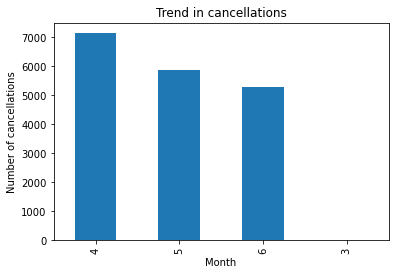

In [86]:
# Filter for cancelled orders
df_cancelled_orders = df[df['Status'] == 'Cancelled']

# Get the month of each order
df_cancelled_orders['Month'] = df_cancelled_orders['Date'].dt.month

# Calculate the number of cancellations for each month
cancelled_orders_per_month = df_cancelled_orders['Month'].value_counts()

# Plot the number of cancellations per month
cancelled_orders_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of cancellations')
plt.title('Trend in cancellations')
plt.show()


### <span style='color:Blue'> *Observatios:* </span>

* The month with the most cancellations is April, followed by May. This could be because April is a popular month for online shopping, and there may be more cancellations due to shipping delays or other factors.
* The city with the most cancellations is Bengaluru, followed by Hyderabad and New Delhi. This could be because these cities are large and have a high population, so there may be more orders placed from these areas.
* The category with the most cancellations is Set, followed by Kurta and Western Dress. This could be because these categories are popular and there may be more orders placed for these items.

## **Overall Insights from Cancellation Analysis:**

1. **Categories vs. Cancellations:** The analysis examines the categories that are most frequently canceled in the dataset.
   - **Top Categories by Cancellations:**
     - Set: 7,337 cancellations.
     - Kurta: 7,255 cancellations.
     - Western Dress: 2,122 cancellations.
     - Top: 1,276 cancellations.
     - Ethnic Dress: 145 cancellations.
     - Blouse: 116 cancellations.
     - Bottom: 60 cancellations.
     - Saree: 21 cancellations.
   
   - **Insight:** Set and Kurta are the top two categories with the highest number of cancellations. This suggests that customers frequently cancel orders for these product categories, possibly due to various reasons like changing preferences or shipping issues.

2. **City vs. Cancellations:** The analysis identifies the cities with the highest number of order cancellations.
   - **Cities with the Most Cancellations:**
     - Bengaluru: 1,312 cancellations.
     - Hyderabad: 1,148 cancellations.
     - New Delhi: 775 cancellations.
     - Mumbai: 747 cancellations.
     - Chennai: 738 cancellations.
     - Pune: 499 cancellations.
     - Kolkata: 305 cancellations.
     - Thane: 239 cancellations.
     - Lucknow: 228 cancellations.
     - Gurugram: 211 cancellations.
   
   - **Insight:** Bengaluru has the highest number of cancellations, followed by Hyderabad and New Delhi. These cities, being major urban centers, may experience higher order volumes and, consequently, more cancellations due to various factors.

3. **Month vs. Cancellations:** The analysis examines cancellations by month.
   - **Cancellations by Month:**
     - April: 7,137 cancellations.
     - May: 5,874 cancellations.
     - June: 5,303 cancellations.
     - March: 18 cancellations.
   
   - **Insight:** April has the highest number of cancellations, followed by May and June. This pattern may be related to seasonal trends, promotions, or external factors affecting order cancellations.

**Key Takeaways:**

- Set and Kurta are the product categories with the highest number of cancellations, suggesting that these categories may need additional attention to reduce cancellation rates or improve customer satisfaction.
- Cities like Bengaluru, Hyderabad, and New Delhi experience a significant number of cancellations, which could be attributed to higher order volumes and complex logistics in these urban areas.
- Monitoring and analyzing cancellation trends by month can help businesses identify seasonal patterns and adjust their operations and customer service strategies accordingly.
- Overall, the cancellation analysis provides valuable insights into product categories, cities, and timing associated with order cancellations. Businesses can use these insights to implement strategies to reduce cancellations, such as improving product descriptions, enhancing customer service, or optimizing delivery processes.

**Business Impact:**

Identifying the most common reasons for cancellations, especially in high-demand months and regions, can lead to improvements in shipping, customer service, and inventory management. Reducing cancellations can enhance customer satisfaction and revenue.

### Summary:
In this e-commerce sales analysis, we have conducted a thorough examination of the provided dataset. The primary focus was on preprocessing data columns for subsequent analysis. We performed detailed analyses of various components of sales data, including revenue analysis, product analysis, geographical analysis, promotion analysis, and cancellations analysis. At each step, we extracted meaningful insights and evaluated their potential business impact.

### Conclusion:
This analysis has enabled us to gain valuable insights into the e-commerce sales data. By dissecting and understanding different aspects of sales, we are better equipped to make informed decisions and optimize various facets of the e-commerce business.

## Thank you

## -Raviteja


<img align="left" img src= in.png height = 20 width="20"/>   https://www.linkedin.com/in/raviteja-padala/ 